# TP 3

## Importaciones generales y cargo de csv's

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

## Regresión logística

### Cargo los archivos ya encodeados

In [2]:
df_train = pd.read_csv("df_train_encodeado_completo.csv")
#df_test = pd.read_csv("df_test_encoding_completo.csv")

In [3]:
df_train.drop(columns = ['Unnamed: 0'], inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_37_T,id_37_nan,id_38_F,id_38_T,id_38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,1,0,0,1,0,0,1,0,2220,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,0.00,150.00,226.00,272.00,87.00,...,0,1,0,0,1,0,0,1,0,0
590536,3577536,0,15811049,39.50,10444,225.00,150.00,224.00,204.00,87.00,...,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.95,12037,595.00,150.00,224.00,231.00,87.00,...,0,1,0,0,1,0,0,1,0,0
590538,3577538,0,15811088,117.00,7826,481.00,150.00,224.00,387.00,87.00,...,0,1,0,0,1,0,0,1,0,0


In [4]:
columnas = list(df_train.columns)
columnas;

In [5]:
columnas_sin_isFraud = columnas
columnas_sin_isFraud.remove('isFraud')
columnas_sin_isFraud;

In [6]:
columnas_sin_isFraud_y_sin_TransactionID = columnas_sin_isFraud
columnas_sin_isFraud_y_sin_TransactionID.remove('TransactionID')
columnas_sin_isFraud_y_sin_TransactionID;

### Entrenamiento

In [7]:
import numpy as np
import math
from tqdm import tqdm
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [8]:
points = df_train[columnas_sin_isFraud_y_sin_TransactionID].values
points

array([[8.6400000e+04, 6.8500000e+01, 1.3926000e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6401000e+04, 2.9000000e+01, 2.7550000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6469000e+04, 5.9000000e+01, 4.6630000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.5811079e+07, 3.0950000e+01, 1.2037000e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5811088e+07, 1.1700000e+02, 7.8260000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5811131e+07, 2.7995000e+02, 1.5066000e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [9]:
points.size/495

590540.0

In [10]:
labels = df_train['isFraud'].values
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.5, random_state = 21)

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.5)

In [14]:
X_train.shape

(295270, 495)

In [15]:
X_test.shape

(295270, 495)

In [16]:
model = LogisticRegression(C=0.5)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [18]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    284874
           1       0.16      0.00      0.01     10396

    accuracy                           0.96    295270
   macro avg       0.56      0.50      0.49    295270
weighted avg       0.94      0.96      0.95    295270



In [19]:
roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

0.5906563905967266

In [20]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    285003
           1       0.15      0.00      0.01     10267

    accuracy                           0.96    295270
   macro avg       0.56      0.50      0.49    295270
weighted avg       0.94      0.96      0.95    295270



In [21]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.5922448209190989

In [55]:
importance = model.coef_[0]

### Pruebo el modelo en el de test

In [34]:
df_test = pd.read_csv("df_test_encoding_completo.csv")

In [35]:
df_test.drop(columns = ['Unnamed: 0'], inplace = True)
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,...,0,1,0,0,1,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,...,0,1,0,0,1,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",...,0,1,0,0,1,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,...,0,1,0,0,1,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,...,0,1,0,0,1,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,...,0,1,0,0,1,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,...,0,1,0,0,1,0,0,0,0,0


In [36]:
df_test_resultados = df_test['TransactionID']
df_test_resultados.head()

0    3663549
1    3663550
2    3663551
3    3663552
4    3663553
Name: TransactionID, dtype: int64

In [37]:
df_test.drop(columns = ['TransactionID'], inplace = True)
df_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id-38_T,id-38_nan,DeviceType_desktop,DeviceType_mobile,DeviceType_nan,id_33_ancho,id_33_alto,card6-debit or credit,id-34_match_status:-1,id-34_match_status:0
0,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,0.00,...,0,1,0,0,1,0,0,0,0,0
1,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,0.00,...,0,1,0,0,1,0,0,0,0,0
2,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",0.00,...,0,1,0,0,1,0,0,0,0,0
3,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,0.00,...,0,1,0,0,1,0,0,0,0,0
4,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,0.00,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,0.00,...,0,1,0,0,1,0,0,0,0,0
506687,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,157.00,...,0,0,0,1,0,0,0,0,0,0
506688,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,0.00,...,0,1,0,0,1,0,0,0,0,0
506689,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,0.00,...,0,1,0,0,1,0,0,0,0,0


In [38]:
valores_predecidos = model.predict_proba(df_test)
valores_predecidos

array([[9.93837254e-01, 6.16274599e-03],
       [9.87617129e-01, 1.23828714e-02],
       [9.93038805e-01, 6.96119452e-03],
       ...,
       [9.99405274e-01, 5.94726434e-04],
       [9.99363248e-01, 6.36751984e-04],
       [9.78565199e-01, 2.14348009e-02]])

In [45]:
lista_de_probas = []

for i in range(len(valores_predecidos)):
    lista_de_probas.append(valores_predecidos[i][1])

lista_de_probas

[0.0061627459907697075,
 0.012382871379463957,
 0.006961194517456751,
 0.007437515486903733,
 0.003255366973732467,
 0.006630806083781227,
 0.0045375685913694105,
 0.0038724480760673496,
 0.013292393092452205,
 0.006352491252108832,
 0.005626711197197552,
 0.010585756348949964,
 0.003042243638420799,
 0.019685998738203734,
 0.0061978392559713545,
 0.014125572910680978,
 0.017269475047411404,
 0.0038782660708857435,
 0.0047388091812472985,
 0.004829666982312454,
 0.003621815920048395,
 0.004417480645673407,
 0.002166304814349282,
 0.008317597359921833,
 0.010034422532045891,
 0.0020093823951606456,
 0.004258034002940807,
 0.008899702281293068,
 0.00788714188524765,
 0.004101039558141832,
 0.003642124717649168,
 0.023577895781921293,
 0.003475370878833689,
 0.010517080069868975,
 0.007791215543025215,
 0.0029878776901381644,
 0.01358624124419383,
 0.010314449736736524,
 0.003959140830885992,
 0.014106417827733963,
 0.0037039003876135476,
 0.004201021721933484,
 0.016736142902411717,
 0.0

In [46]:
submit = pd.concat([df_test_resultados, pd.Series(lista_de_probas, name='isFraud')], axis=1)
submit.set_index('TransactionID', inplace=True)
submit.head()

,isFraud
TransactionID,
3663549,0.01
3663550,0.01
3663551,0.01
3663552,0.01
3663553,0.00


In [49]:
submit.to_csv('submit_logistic_regression.csv', index = True)

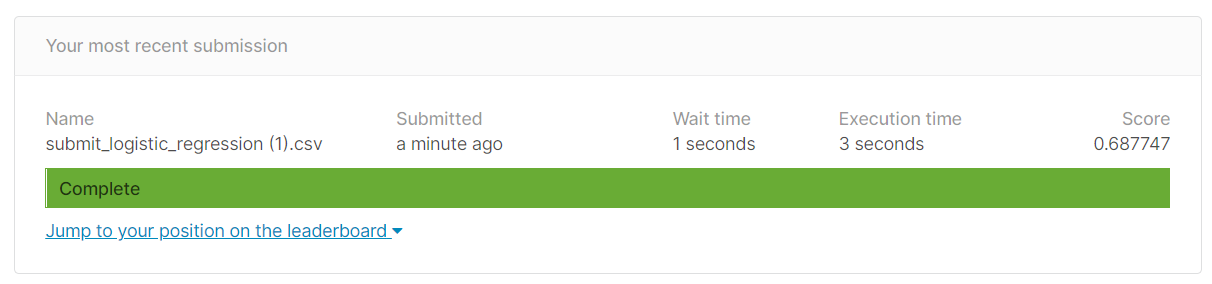

### Búsqueda de hiperparámetros

In [99]:
puntajes_de_las_columnas = {}

# summarize feature importance
for i,v in enumerate(importance):
    print('Columna', columnas_sin_isFraud_y_sin_TransactionID[i], '  -  Score: %.5f' % (v))
    #puntajes_de_las_columnas.append((columnas_sin_isFraud_y_sin_TransactionID[i], v))
    puntajes_de_las_columnas.update({v: columnas_sin_isFraud_y_sin_TransactionID[i]})

Columna TransactionDT   -  Score: -0.00000
Columna TransactionAmt   -  Score: -0.00026
Columna card1   -  Score: -0.00015
Columna card2   -  Score: -0.00089
Columna card3   -  Score: -0.00035
Columna card5   -  Score: -0.00053
Columna addr1   -  Score: -0.00083
Columna addr2   -  Score: -0.00025
Columna dist1   -  Score: -0.00012
Columna dist2   -  Score: -0.00002
Columna P_emaildomain   -  Score: -0.00000
Columna R_emaildomain   -  Score: -0.00000
Columna C1   -  Score: 0.00000
Columna C2   -  Score: 0.00002
Columna C3   -  Score: -0.00000
Columna C4   -  Score: 0.00001
Columna C5   -  Score: -0.00002
Columna C6   -  Score: -0.00001
Columna C7   -  Score: 0.00000
Columna C8   -  Score: 0.00001
Columna C9   -  Score: -0.00002
Columna C10   -  Score: 0.00000
Columna C11   -  Score: -0.00001
Columna C12   -  Score: 0.00001
Columna C13   -  Score: -0.00012
Columna C14   -  Score: -0.00002
Columna D1   -  Score: -0.00038
Columna D2   -  Score: -0.00038
Columna D3   -  Score: -0.00007
Colum

In [100]:
puntajes_de_las_columnas

{-1.1875082494613844e-07: 'TransactionDT',
 -0.0002615088848705676: 'TransactionAmt',
 -0.00014681107787960142: 'card1',
 -0.00089239186572156: 'card2',
 -0.0003545636426560703: 'card3',
 -0.0005332354848413628: 'card5',
 -0.0008306554139552002: 'addr1',
 -0.0002541447400674034: 'addr2',
 -0.0001219696218667407: 'dist1',
 -2.090663171214968e-05: 'dist2',
 -6.71227238711564e-08: 'P_emaildomain',
 -3.5339920342485757e-09: 'R_emaildomain',
 1.6339589243081055e-06: 'C1',
 2.0179432732937463e-05: 'C2',
 -4.3765825571386705e-08: 'C3',
 5.043853003750535e-06: 'C4',
 -2.3730154510851835e-05: 'C5',
 -1.4866447824232773e-05: 'C6',
 3.208655090028304e-06: 'C7',
 9.77025319383142e-06: 'C8',
 -1.7280390258583564e-05: 'C9',
 1.4198644114339518e-06: 'C10',
 -6.496677101040174e-06: 'C11',
 1.0583531504795654e-05: 'C12',
 -0.00012054306768781259: 'C13',
 -2.4961312438931356e-05: 'C14',
 -0.0003834349542468833: 'D1',
 -0.00038358603700769454: 'D2',
 -7.048425385825465e-05: 'D3',
 -0.00034769269576199747

In [106]:
puntajes_de_las_columnas = dict(sorted(puntajes_de_las_columnas.items()))

In [107]:
dictionary_items = puntajes_de_las_columnas.items()
for item in dictionary_items:
    print(item)

(-0.00089239186572156, 'card2')
(-0.0008306554139552002, 'addr1')
(-0.0007492755828614308, 'id_33_ancho')
(-0.0005332354848413628, 'card5')
(-0.0005059416681367397, 'D15')
(-0.00046021777941137075, 'id_33_alto')
(-0.00041004349659754376, 'D10')
(-0.00038358603700769454, 'D2')
(-0.0003834349542468833, 'D1')
(-0.0003545636426560703, 'card3')
(-0.00034769269576199747, 'D4')
(-0.0002958758058760796, 'V332')
(-0.0002615088848705676, 'TransactionAmt')
(-0.0002541447400674034, 'addr2')
(-0.00023697684153769564, 'D11')
(-0.0002273457464613229, 'V127')
(-0.0002270876688782365, 'V333')
(-0.0001921983781089118, 'V331')
(-0.00017915567366453433, 'V165')
(-0.00014681107787960142, 'card1')
(-0.0001459314267932498, 'V164')
(-0.00013030564219257865, 'V130')
(-0.0001225073592771239, 'V310')
(-0.0001219696218667407, 'dist1')
(-0.00012054306768781259, 'C13')
(-0.0001101687346515498, 'V126')
(-8.667562823058373e-05, 'V159')
(-8.650518712302313e-05, 'D5')
(-8.138640684467971e-05, 'D8')
(-7.476078931678235e

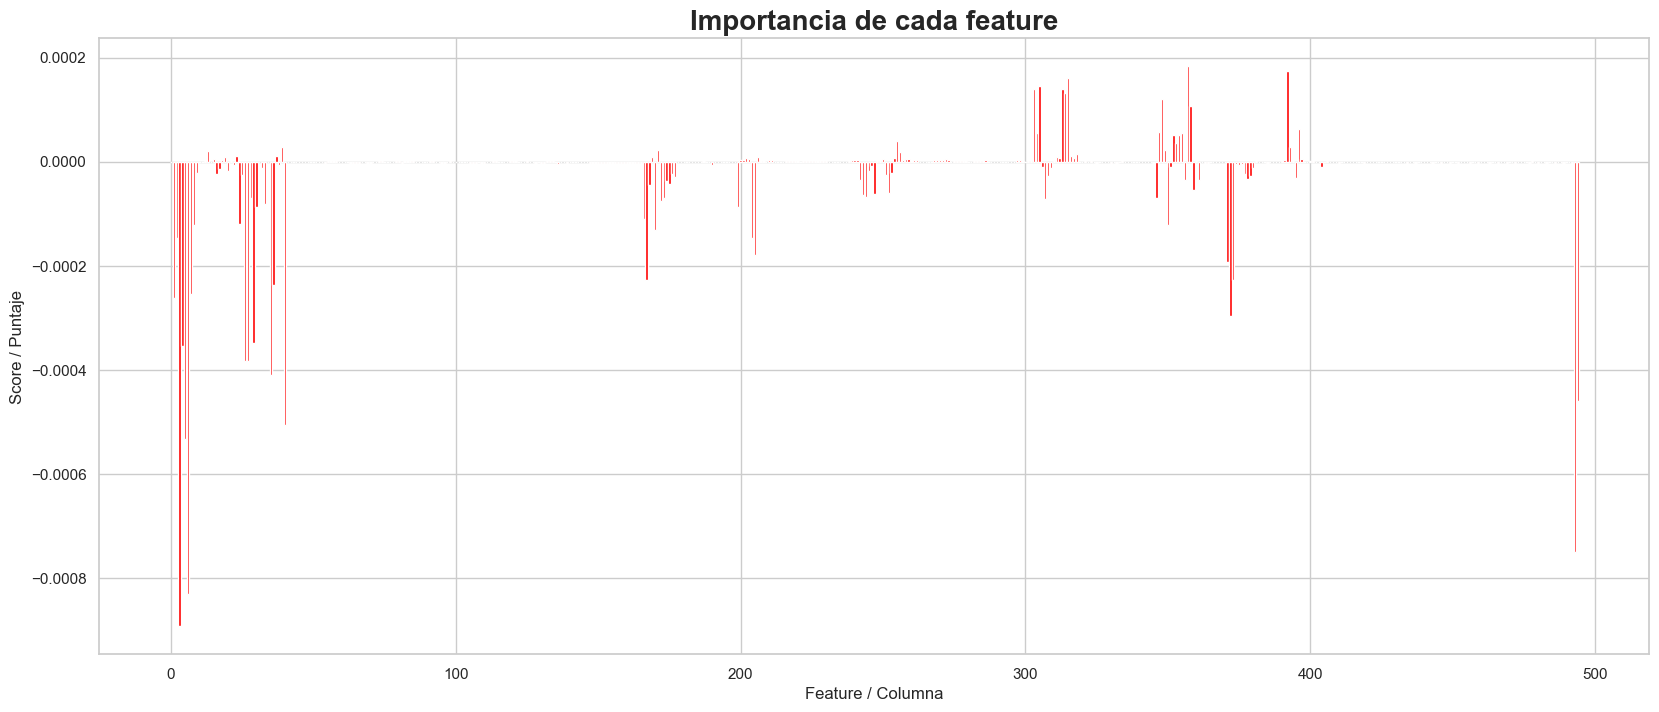

In [76]:
# plot feature importance
fig = plt.figure(figsize = (20, 8))
pyplot.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
pyplot.show()

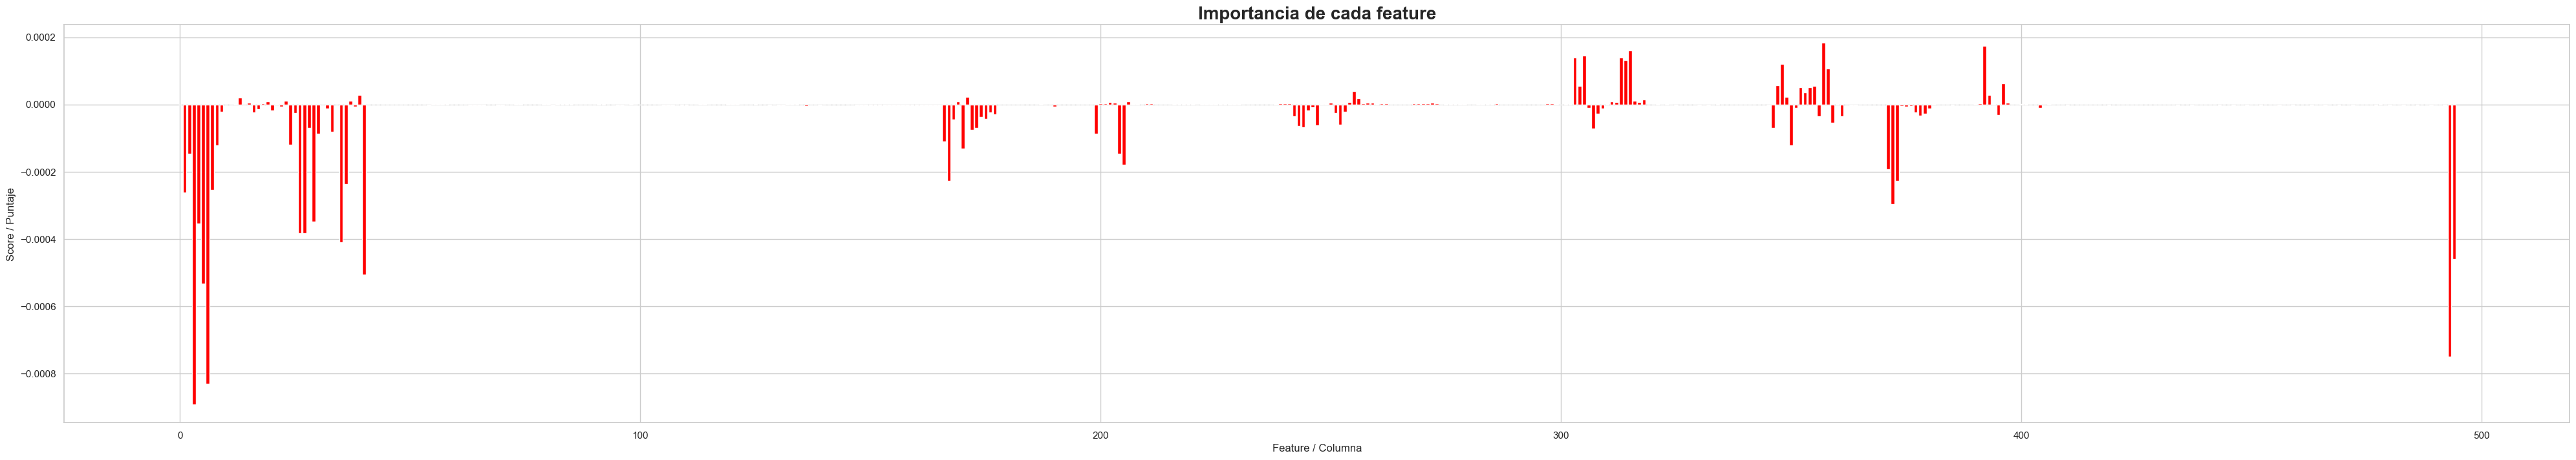

In [85]:
# plot feature importance
fig = plt.figure(figsize = (50, 8))
pyplot.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
pyplot.show()